<a href="https://colab.research.google.com/github/incubusV/colab/blob/main/Mapping_Survey_Mobile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MOCK DATA**

The minimum distance in the group closest to Point 0 in set1 is 11.28m
The minimum distance in the group closest to Point 4 in set1 is 11.17m


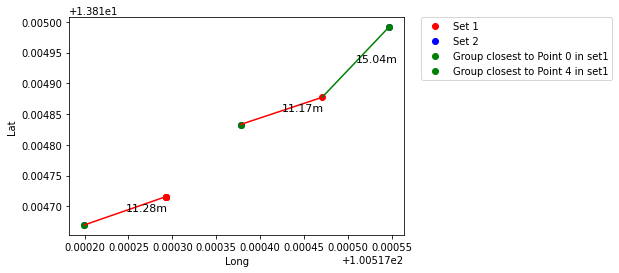

In [ ]:
from shapely.geometry import Point, MultiPoint
import matplotlib.pyplot as plt
from collections import defaultdict
import csv
from geopy.distance import geodesic

# Create two sets of points from latitude and longitude values
set1 = [(13.81471581, 100.517293),
        (13.81471581, 100.517293),
        (13.81471581, 100.517293),
        (13.81471581, 100.517293),
        (13.81487713, 100.5174705)]

set2 = [(13.81466971, 100.5171999),
        (13.81483295, 100.5173776),
        (13.81499107, 100.5175464)]

# Find the nearest point in set 1 for each point in set 2
nearest_points = []
for point2 in set2:
    min_distance = float('inf')
    nearest_point = None
    for point1 in set1:
        distance = geodesic(point1, point2).meters
        if distance < min_distance:
            min_distance = distance
            nearest_point = point1
    nearest_points.append(nearest_point)

# Group the data in set2 according to the proximity of the data in set1
grouped_data = defaultdict(list)
for i, point2 in enumerate(set2):
    nearest_point = nearest_points[i]
    if nearest_point:
        grouped_data[nearest_point].append(point2)

# Write the data to a CSV file
with open('grouped_data.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['nearest_point', 'group_point', 'distance'])
    for nearest_point, group in grouped_data.items():
        for point2 in group:
            distance = geodesic(nearest_point, point2).meters
            writer.writerow([nearest_point, point2, distance])


          
# Plot the data and display the minimum distance in each group
plt.plot([point[1] for point in set1], [point[0] for point in set1], 'ro', label='Set 1')
plt.plot([point[1] for point in set2], [point[0] for point in set2], 'bo', label='Set 2')
for nearest_point, group in grouped_data.items():
    min_group_distance = float('inf')
    group_points = []
    for point2 in group:
        min_group_distance = min(min_group_distance, geodesic(nearest_point, point2).meters)
        group_points.append(point2)
    x = [point[1] for point in group_points]
    y = [point[0] for point in group_points]
    plt.plot(x, y, 'go', label='Group closest to Point {} in set1'.format(set1.index(nearest_point)))
    for i in range(len(group_points)):
        x1, y1 = group_points[i][1], group_points[i][0]
        x2, y2 = nearest_point[1], nearest_point[0]
        color = 'g' if geodesic(group_points[i], nearest_point).meters != min_group_distance else 'r'
        plt.plot([x1, x2], [y1, y2], color+'-')
        plt.text((x1+x2)/2, (y1+y2)/2, '{:.2f}m'.format(geodesic(group_points[i], nearest_point).meters), fontsize=11)
    print("The minimum distance in the group closest to Point {} in set1 is {:.2f}m".format(set1.index(nearest_point), min_group_distance))
plt.xlabel('Long')
plt.ylabel('Lat')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

**TEST DEMO DATA CSV**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Current working directory: /content/drive/MyDrive/Colab Notebooks/Data/Data (Mapping Survey-Mobile)
1_demo.csv  1_Survey_L1_5M.csv	2_demo.csv  2_L1_SS_FFT.csv
The minimum distance in the group closest to Point 0 in set1 is 11.28m
The minimum distance in the group closest to Point 4 in set1 is 11.17m
The minimum distance in the group closest to Point 9 in set1 is 12.36m


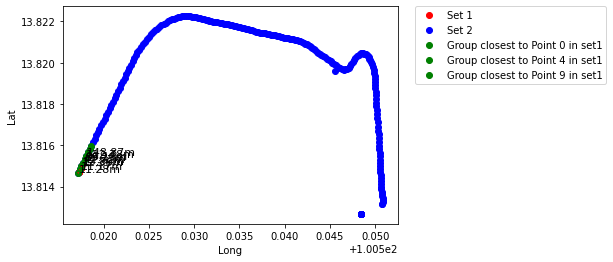

In [ ]:
from google.colab import drive
import os, csv, io
from geopy.distance import geodesic
from collections import defaultdict
import matplotlib.pyplot as plt

# Mount your Google Drive
drive.mount('/content/drive')

# Change directory to the desired location
os.chdir('/content/drive/MyDrive/Colab Notebooks/Data/Data (Mapping Survey-Mobile)')

# Print the current working directory to confirm that you're in the right location
print("Current working directory:", os.getcwd())

!ls

# Load set1 data from CSV file
set1 = []
with open('1_demo.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        set1.append((float(row['LATITUDE']), float(row['LONGITUDE'])))

# Load set2 data from CSV file
set2 = []
with open('2_demo.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        set2.append((float(row['Lat']), float(row['Long'])))

# Find the nearest point in set 1 for each point in set 2
nearest_points = []
for point2 in set2:
    min_distance = float('inf')
    nearest_point = None
    for point1 in set1:
        distance = geodesic(point1, point2).meters
        if distance < min_distance and distance <= 150:
            min_distance = distance
            nearest_point = point1
    nearest_points.append(nearest_point)

# Group the data in set2 according to the proximity of the data in set1
grouped_data = defaultdict(list)
for i, point2 in enumerate(set2):
    nearest_point = nearest_points[i]
    if nearest_point:
        grouped_data[nearest_point].append(point2)

# Create a dictionary to store the rank of each point in set2
ranks = {}
for nearest_point, group in grouped_data.items():
    sorted_group = sorted(group, key=lambda x: geodesic(nearest_point, x).meters)
    for i, point2 in enumerate(sorted_group):
        ranks[point2] = i + 1

# Write the data from set2 along with the rank to a new CSV file
with open('output_demo.csv', 'w', newline='') as csvfile:
    fieldnames = ['Lat', 'Long', 'Rank', 'Nearest_Lat_set1', 'Nearest_Long_set1', 'Distance']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for point2 in set2:
        nearest_point = nearest_points[set2.index(point2)]
        rank = ranks.get(point2, None)
        if rank is not None:
            distance = geodesic(nearest_point, point2).meters
            writer.writerow({
                'Lat': point2[0],
                'Long': point2[1],
                'Rank': rank,
                'Nearest_Lat_set1': nearest_point[0],
                'Nearest_Long_set1': nearest_point[1],
                'Distance': distance
            })

# Plot the data and display the minimum distance in each group
plt.plot([point[1] for point in set1], [point[0] for point in set1], 'ro', label='Set 1')
plt.plot([point[1] for point in set2], [point[0] for point in set2], 'bo', label='Set 2')
for nearest_point, group in grouped_data.items():
    min_group_distance = float('inf')
    group_points = []
    for point2 in group:
        min_group_distance = min(min_group_distance, geodesic(nearest_point, point2).meters)
        group_points.append(point2)
    x = [point[1] for point in group_points]
    y = [point[0] for point in group_points]
    plt.plot(x, y, 'go', label='Group closest to Point {} in set1'.format(set1.index(nearest_point)))
    for i in range(len(group_points)):
        x1, y1 = group_points[i][1], group_points[i][0]
        x2, y2 = nearest_point[1], nearest_point[0]
        color = 'g' if geodesic(group_points[i], nearest_point).meters != min_group_distance else 'r'
        plt.plot([x1, x2], [y1, y2], color+'-')
        plt.text((x1+x2)/2, (y1+y2)/2, '{:.2f}m'.format(geodesic(group_points[i], nearest_point).meters), fontsize=11)
    print("The minimum distance in the group closest to Point {} in set1 is {:.2f}m".format(set1.index(nearest_point), min_group_distance))
plt.xlabel('Long')
plt.ylabel('Lat')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

**USE RealDATA**

In [ ]:
from google.colab import drive
import os, csv
from geopy.distance import geodesic
from collections import defaultdict
import matplotlib.pyplot as plt

# Mount your Google Drive
drive.mount('/content/drive')

# Change directory to the desired location
os.chdir('/content/drive/MyDrive/Colab Notebooks/Data/Data (Mapping Survey-Mobile)')

# Print the current working directory to confirm that you're in the right location
print("Current working directory:", os.getcwd())

!ls

# Load set1 data from CSV file
set1 = []
with open('1_Survey_L1_5M.csv', 'rb') as csvfile:
    reader = csv.DictReader(io.TextIOWrapper(csvfile, encoding='utf-8-sig'))
    for row in reader:
        lat = float(row['LATITUDE']) if row['LATITUDE'] != '' else 0
        lon = float(row['LONGITUDE']) if row['LONGITUDE'] != '' else 0
        chainage = float(row['CHAINAGE']) if row['CHAINAGE'] else None
        speed =  float(row['SPEED']) if row['SPEED'] else None
        lwp_iri =  float(row['LWP_IRI']) if row['LWP_IRI'] else None
        lwp_quality =  float(row['LWP_QUALITY']) if row['LWP_QUALITY'] else None
        cwp_iri =  float(row['CWP_IRI']) if row['CWP_IRI'] else None
        cwp_quality =  float(row['CWP_QUALITY']) if row['CWP_QUALITY'] else None
        rwp_iri =  float(row['RWP_IRI']) if row['RWP_IRI'] else None
        rwp_quality =  float(row['RWP_QUALITY']) if row['RWP_QUALITY'] else None
        lane_iri =  float(row['LANE_IRI']) if row['LANE_IRI'] else None
        lwp_mpd =  float(row['LWP_MPD']) if row['LWP_MPD'] else None
        lwp_quality =  float(row['LWP_QUALITY']) if row['LWP_QUALITY'] else None
        cwp_mpd =  float(row['CWP_MPD']) if row['CWP_MPD'] else None
        cwp_quality =  float(row['CWP_QUALITY']) if row['CWP_QUALITY'] else None
        rwp_mpd =  float(row['RWP_MPD']) if row['RWP_MPD'] else None
        rwp_quality =  float(row['RWP_QUALITY']) if row['RWP_QUALITY'] else None
        lane_mpd =  float(row['LANE_MPD']) if row['LANE_MPD'] else None
        rut_edg_se =  float(row['RUT_EDG_SE']) if row['RUT_EDG_SE'] else None
        rut_ctr_se =  float(row['RUT_CTR_SE']) if row['RUT_CTR_SE'] else None
        rut_se =  float(row['RUT_SE']) if row['RUT_SE'] else None
        alt_msl =  float(row['ALT_MSL']) if row['ALT_MSL'] else None
        heading =  float(row['HEADING']) if row['HEADING'] else None
        pdop =  float(row['PDOP']) if row['PDOP'] else None

        set1.append((lat, lon, chainage, speed, lwp_iri, lwp_quality, cwp_iri, cwp_quality, rwp_iri, rwp_quality, lane_iri, lwp_mpd, lwp_quality, cwp_mpd, cwp_quality, \
                     rwp_mpd, rwp_quality, lane_mpd, rut_edg_se, rut_ctr_se, rut_se, alt_msl, heading, pdop))

# Load set2 data from CSV file
set2 = []
with open('2_L1_SS_FFT.csv', 'rb') as csvfile:
    reader = csv.DictReader(io.TextIOWrapper(csvfile, encoding='utf-8-sig'))
    for row in reader:
        lat = float(row['Lat']) if row['Lat'] != '' else 0
        lon = float(row['Long']) if row['Long'] != '' else 0
        project = row['ชื่อโครงการ']
        user = row['ผู้ใช้']
        tel = row['โทรศัพท์']
        road_type = row['ประเภทถนน']
        traffic_lane = row['ช่องจราจร']
        weather = row['อากาศ']
        note = row['หมายเหตุ']
        datetime = row['วันเวลา']
        weather = row['อากาศ']
        altitude = float(row['อัลติจูด']) if row['อัลติจูด'] != '' else 0
        x = float(row['x']) if row['x'] != '' else 0
        y = float(row['y']) if row['y'] != '' else 0
        z = float(row['z']) if row['z'] != '' else 0
        direction = float(row['ทิศ']) if row['ทิศ'] != '' else 0
        speed = float(row['ความเร็ว']) if row['ความเร็ว'] != '' else 0
        peak_ftt = float(row['peak_ftt']) if row['peak_ftt'] != '' else 0
        set2.append((lat, lon, project, user, tel, road_type, traffic_lane, weather, note, datetime, weather, altitude, x, y, z, direction, speed, peak_ftt))


# Find the nearest point in set 1 for each point in set 2
nearest_points = []
for point2 in set2:
    min_distance = float('inf')
    nearest_point = None
    for point1 in set1:
        distance = geodesic(point1[:2], point2[:2]).meters
        if distance < min_distance and distance <= 150:
            min_distance = distance
            nearest_point = point1
    nearest_points.append(nearest_point)

# Group the data in set2 according to the proximity of the data in set1
grouped_data = defaultdict(list)
for i, point2 in enumerate(set2):
    nearest_point = nearest_points[i]
    if nearest_point:
        grouped_data[nearest_point].append(point2)

# Create a dictionary to store the rank of each point in set2
ranks = {}
for nearest_point, group in grouped_data.items():
    sorted_group = sorted(group, key=lambda x: geodesic(nearest_point[:2], x[:2]).meters)
    for i, point2 in enumerate(sorted_group):
        ranks[point2] = i + 1

# Write the data from set2 along with the rank to a new CSV file
with open('output.csv', 'w', newline='') as csvfile:
    fieldnames = ['Lat', 'Long', 'Rank', 'Nearest_Lat_set1', 'Nearest_Long_set1', 'Distance', 'CHAINAGE', 'SPEED', 'LWP_IRI', 'LWP_QUALITY', 'CWP_IRI', 'CWP_QUALITY', 'RWP_IRI', 'RWP_QUALITY', 'LANE_IRI', 'LWP_MPD', 'CWP_MPD', 'RWP_MPD', 'LANE_MPD', 'RUT_EDG_SE', 'RUT_CTR_SE', 'RUT_SE', 'ALT_MSL', 'HEADING', 'PDOP', 'ชื่อโครงการ', 'ผู้ใช้', 'โทรศัพท์', 'ประเภทถนน', 'ช่องจราจร', 'อากาศ', 'หมายเหตุ', 'วันเวลา', 'อัลติจูด', 'x', 'y', 'z', 'ทิศ', 'ความเร็ว', 'peak_ftt']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for point2 in set2:
        nearest_point = nearest_points[set2.index(point2)]
        rank = ranks.get(point2, None)
        if rank is not None:
            distance = geodesic(nearest_point[:2], point2[:2]).meters
            writer.writerow({
                'Lat': point2[0],
                'Long': point2[1],
                'Rank': rank,
                'Nearest_Lat_set1': nearest_point[0],
                'Nearest_Long_set1': nearest_point[1],
                'Distance': distance,
                'CHAINAGE': nearest_point[2],
                'SPEED': nearest_point[3],
                'LWP_IRI': nearest_point[4],
                'LWP_QUALITY': nearest_point[5],
                'CWP_IRI': nearest_point[6],
                'CWP_QUALITY': nearest_point[7],
                'RWP_IRI': nearest_point[8],
                'RWP_QUALITY': nearest_point[9],
                'LANE_IRI': nearest_point[10],
                'LWP_MPD': nearest_point[11],
                'CWP_MPD': nearest_point[13],
                'RWP_MPD': nearest_point[15],
                'LANE_MPD': nearest_point[17],
                'RUT_EDG_SE': nearest_point[18],
                'RUT_CTR_SE': nearest_point[19],
                'RUT_SE': nearest_point[20],
                'ALT_MSL': nearest_point[21],
                'HEADING': nearest_point[22],
                'PDOP': nearest_point[23],
                'ชื่อโครงการ': point2[2],
                'ผู้ใช้': point2[3],
                'โทรศัพท์': point2[4],
                'ประเภทถนน': point2[5],
                'ช่องจราจร': point2[6],
                'อากาศ': point2[7],
                'หมายเหตุ': point2[8],
                'วันเวลา': point2[9],
                'อัลติจูด': point2[10],
                'x': point2[11],
                'y': point2[12],
                'z': point2[13],
                'ทิศ': point2[14],
                'ความเร็ว': point2[15],
                'peak_ftt': point2[16]
          })

# # Plot the data and display the minimum distance in each group
# plt.plot([point[1] for point in set1], [point[0] for point in set1], 'ro', label='Set 1')
# plt.plot([point[1] for point in set2], [point[0] for point in set2], 'bo', label='Set 2')
# for nearest_point, group in grouped_data.items():
#     min_group_distance = float('inf')
#     group_points = []
#     for point2 in group:
#         min_group_distance = min(min_group_distance, geodesic(nearest_point[:2], point2[:2]).meters)
#         group_points.append(point2)
#     x = [point[1] for point in group_points]
#     y = [point[0] for point in group_points]
#     plt.plot(x, y, 'go', label='Group closest to Point {} in set1'.format(set1.index(nearest_point)))
#     for i in range(len(group_points)):
#         x1, y1 = group_points[i][1], group_points[i][0]
#         x2, y2 = nearest_point[1], nearest_point[0]
#         color = 'g' if geodesic(group_points[i][:2], nearest_point[:2]).meters != min_group_distance else 'r'
#         plt.plot([x1, x2], [y1, y2], color+'-')
#         plt.text((x1+x2)/2, (y1+y2)/2, '{:.2f}m'.format(geodesic(group_points[i][:2], nearest_point[:2]).meters), fontsize=11)
#     print("The minimum distance in the group closest to Point {} in set1 is {:.2f}m".format(set1.index(nearest_point), min_group_distance))
# plt.xlabel('Long')
# plt.ylabel('Lat')
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Current working directory: /content/drive/MyDrive/Colab Notebooks/Data/Data (Mapping Survey-Mobile)
1_demo.csv  1_Survey_L1_5M.csv	2_demo.csv  2_L1_SS_FFT.csv  output_demo.csv
